## Importing Libraries 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

from sklearn.metrics import r2_score

In [44]:
df=pd.read_csv(r"adm_data.csv")

In [45]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [46]:
df.shape

(400, 9)

In [48]:
df.duplicated().sum()

0

In [49]:
df.drop(columns = ['Serial No.'],inplace=True)

In [52]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## ANN-Regressor algo building 

In [53]:
X = df.drop(columns=['Chance of Admit '])#space is present
y = df['Chance of Admit '].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [70]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))#input layer
model.add(Dense(7,activation='relu'))#hidden layer
model.add(Dense(1,activation='linear'))#output layer

In [71]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 7)                 56        
                                                                 
 dense_20 (Dense)            (None, 7)                 56        
                                                                 
 dense_21 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [82]:
history = model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4569 - val_loss: 0.4338
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3497 - val_loss: 0.2893
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2108 - val_loss: 0.1390
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0869 - val_loss: 0.0339
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0138
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0152 - val_loss: 0.0225
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0172 - val_loss: 0.0165
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0120 - val_loss: 0.0120
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0115
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.0114
Epoch 11/100
8/8 [===========

In [83]:
y_pred = model.predict(X_test_trf)

3/3 [==============================] - 0s 4ms/step


In [84]:
y_pred

array([[0.7233892 ],
       [0.78705573],
       [0.79404056],
       [0.6537119 ],
       [0.6807896 ],
       [0.5477549 ],
       [0.7549755 ],
       [0.61839145],
       [0.92730004],
       [0.9365201 ],
       [0.6147453 ],
       [0.87972355],
       [0.7240354 ],
       [0.4530598 ],
       [0.8376395 ],
       [0.6265275 ],
       [0.52457446],
       [0.7934969 ],
       [0.49403885],
       [0.7196419 ],
       [0.97069114],
       [0.83242196],
       [0.72989905],
       [0.4534895 ],
       [0.8488816 ],
       [0.57737434],
       [0.40928963],
       [0.6459833 ],
       [0.9659487 ],
       [0.64668226],
       [0.5867424 ],
       [0.7323194 ],
       [0.7628507 ],
       [0.5622313 ],
       [0.80073   ],
       [0.83010113],
       [0.63792115],
       [0.86949074],
       [0.61467224],
       [0.9814605 ],
       [0.7280681 ],
       [0.66767263],
       [0.7282132 ],
       [0.74086124],
       [0.9545375 ],
       [0.68160737],
       [0.5741149 ],
       [0.770

In [86]:
r2_score(y_test,y_pred)

0.6875829963001587

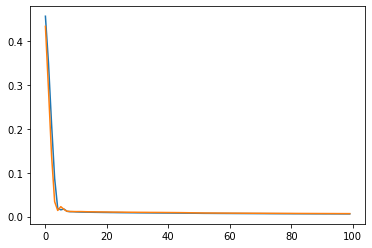

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])